<h1> Mini-projet DataViz : qui avait le plus de chances de survivre au Titanic ? </h1>

<b> 1) Visualisation des Taux de Survie sur le Titanic </b>

objectif : Créer un graphique représentant les taux de survie des passagers du Titanic, en fonction de leur groupe d'âge et de leur sexe.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
titanic = pd.read_csv('Titanic-Dataset.csv')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Les intervalles d'âge
labels = [0,10,20, 30, 40, 50, 60, 70, 80, 90]  # Les étiquettes pour chaque tranche
titanic['Age Group'] = pd.cut(titanic['Age'] , bins= bins, labels = labels)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20


In [12]:
#1
# Taux_survived
Taux_survived = titanic.groupby(['Age Group' , 'Sex'], observed = True)['Survived'].mean().unstack()
Taux_survived

Sex,female,male
Age Group,,
0,0.612903,0.575758
10,0.739130,0.144928
20,0.753086,0.154362
30,0.836364,0.230000
40,0.677419,0.218182
50,0.928571,0.142857
60,1.000000,0.071429
70,NaN,0.200000


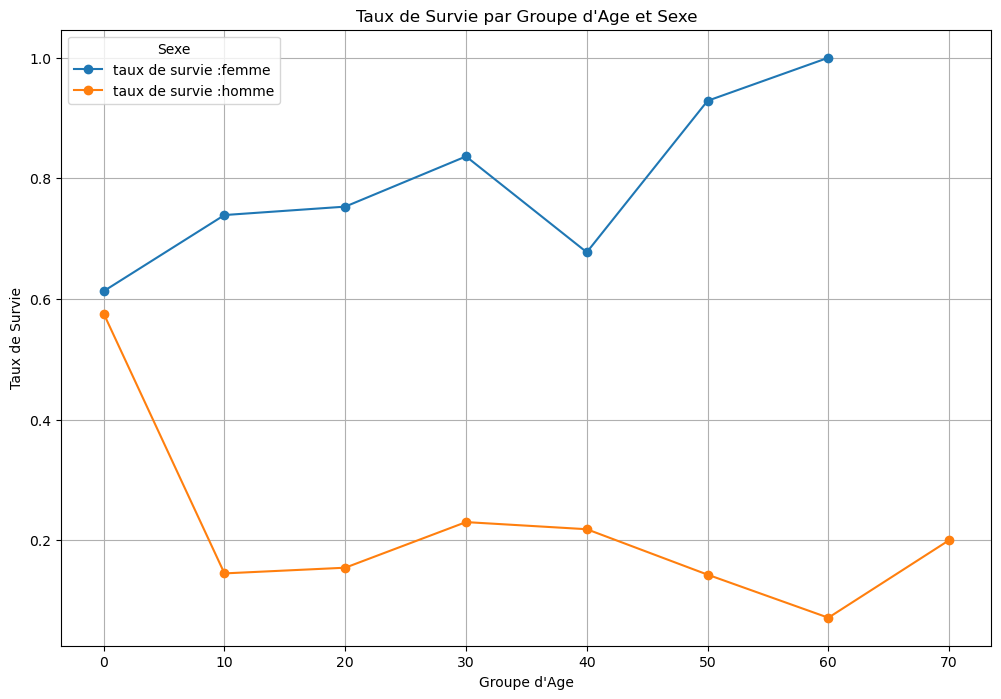

In [14]:
# Création du graphique à aires empilées
plt.figure(figsize=(12, 8))
plt.plot(Taux_survived.index , Taux_survived['female'] ,  marker = 'o'  , label ='taux de survie :femme')
plt.plot(Taux_survived.index , Taux_survived['male'] ,  marker = 'o'  , label ='taux de survie :homme')

plt.title('Taux de Survie par Groupe d\'Age et Sexe')
plt.xlabel('Groupe d\'Age')
plt.ylabel('Taux de Survie')
plt.legend(title='Sexe')
plt.grid(True)
plt.show()

<b> 2) Répartition des Passagers du Titanic par Lieu d'Embarquement et Classe </b>

objectif : Créer un ensemble de graphiques en barres qui montrent le nombre de passagers du Titanic pour chaque classe, répartis selon leur lieu d'embarquement (Cherbourg, Queenstown, Southampton).

In [19]:
#1
count_by_class_embarked = titanic.groupby(['Pclass' , 'Embarked']  , observed = True).size().unstack()
count_by_class_embarked

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


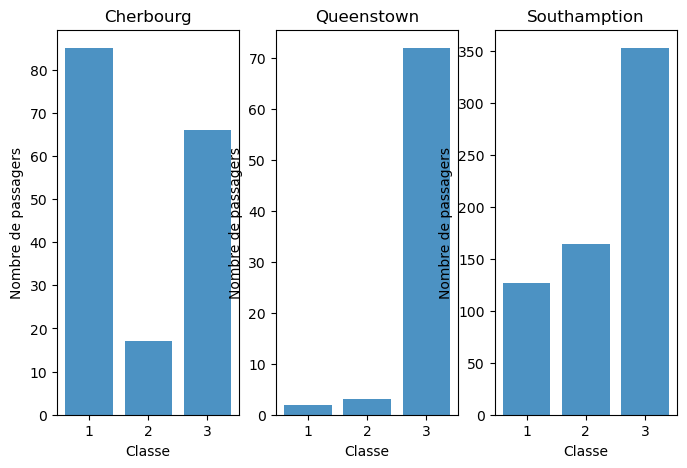

In [21]:
#2
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(131) 
ax1.bar(count_by_class_embarked.index , count_by_class_embarked['C'] ,alpha = 0.8)
ax1.set_title('Cherbourg')
ax1.set_xlabel('Classe')
ax1.set_ylabel('Nombre de passagers')
ax1.set_xticks([1,2,3]) # valeur de chaque diagramme, à faire sinon une échelle numérique va être ajouté au diagramme

ax2 = fig.add_subplot(132) 
ax2.bar(count_by_class_embarked.index , count_by_class_embarked['Q'] ,alpha = 0.8)
ax2.set_title('Queenstown')
ax2.set_xlabel('Classe')
ax2.set_ylabel('Nombre de passagers')
ax2.set_xticks([1,2,3])

ax3 = fig.add_subplot(133) 
ax3.bar(count_by_class_embarked.index , count_by_class_embarked['S'],alpha = 0.8)
ax3.set_title('Southamption')
ax3.set_xlabel('Classe')
ax3.set_ylabel('Nombre de passagers')
ax3.set_xticks([1,2,3])

plt.show()